# Using some United States SARS-CoV-2 Variant Nowcast Hub Data

In [1]:
import polars as pl
import numpy as np
import pymc as pm
import pytensor as pt
# import requests
# import gzip
# import shutil
# import os

In [2]:
# # Define file paths and URL
# tsv_name = "metadata.tsv"
# tsv_url = "https://data.nextstrain.org/files/ncov/open/metadata.tsv.gz"

# # Download and unzip the file if it doesn't exist
# if not os.path.exists(tsv_name):
#     response = requests.get(tsv_url)
#     with open(tsv_name + ".gz", 'wb') as f:
#         f.write(response.content)
#     with gzip.open(tsv_name + ".gz", 'rb') as f_in:
#         with open(tsv_name, 'wb') as f_out:
#             shutil.copyfileobj(f_in, f_out)

# # Read data with only the necessary columns
# dat = pl.read_csv(tsv_name, separator='\t', columns=["division", "Nextstrain_clade", "date", "date_submitted", "host"])

# # Filter by location
# state_names = ["Washington DC", "Puerto Rico"]  # Add state names as needed
# dat = dat.filter(pl.col("division").is_in(state_names))

# # Exclude any rows that have NA dates
# dat = dat.with_columns(pl.col("date").str.strptime(pl.Date, "%Y-%m-%d", strict=False))
# dat = dat.filter(pl.col("date").is_not_null())
# dat = dat.filter(pl.col("date_submitted").is_not_null())

# # Only include human specimens
# dat = dat.filter(pl.col("host") == "Homo sapiens")

# # Rename columns and exclude the host column
# dat = dat.select([
#     pl.col("division").alias("location"),
#     pl.col("Nextstrain_clade").alias("clade"),
#     pl.col("date"),
#     pl.col("date_submitted")
# ])

# # Save the filtered data to a CSV file
# dat.write_csv("metadata.csv")

# print("Data processing complete. The filtered metadata has been saved to metadata.csv.")

In [4]:
# List of US states full names
us_states_full_names = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", 
    "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", 
    "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", 
    "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", 
    "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", 
    "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", 
    "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", 
    "Tennessee", "Texas", "Utah", "Vermont", "Virginia", 
    "Washington", "West Virginia", "Wisconsin", "Wyoming"
]

# Dictionary mapping full names to their 2 letter abbreviations
us_states_abbreviation_dict = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 
    'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 
    'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 
    'New Mexico': 'NM', 'New York': 'NY', 
    'North Carolina': 'NC', 'North Dakota': 'ND', 
    'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 
    'Pennsylvania': 'PA', 'Rhode Island': 'RI', 
    'South Carolina': 'SC', 'South Dakota': 'SD', 
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

print("List of US States Full Names:")
print(us_states_full_names)

print("\nDictionary Mapping Full Names to 2 Letter Abbreviations:")
print(us_states_abbreviation_dict)

List of US States Full Names:
['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

Dictionary Mapping Full Names to 2 Letter Abbreviations:
{'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': '

In [5]:
df = pl.read_csv("counts_2025-02-19.tsv.gz" ,separator='\t')
df.head()

location,clade,date,sequences
str,str,str,i64
"""Afton""","""23E""","""2023-08-25""",1
"""Afton""","""23F""","""2023-08-26""",1
"""Alabama""","""19A""","""2021-07-30""",1
"""Alabama""","""19A""","""2021-08-01""",2
"""Alabama""","""19A""","""2021-08-04""",1


In [6]:
df.describe()

statistic,location,clade,date,sequences
str,str,str,str,f64
"""count""","""210365""","""210365""","""210365""",210365.0
"""null_count""","""0""","""0""","""0""",0.0
"""mean""",null,null,null,16.771421
"""std""",null,null,null,71.228218
"""min""","""Afton""","""19A""","""2020-01-01""",1.0
"""25%""",null,null,null,1.0
"""50%""",null,null,null,3.0
"""75%""",null,null,null,9.0
"""max""","""Yap""","""recombinant""","""2025-02-04""",4472.0


In [7]:
df['location'].unique()

location
str
"""Sp"""
"""Louisiana"""
"""Afton"""
"""Texas"""
"""Vermont"""
…
"""Great Falls"""
"""Mt Solon"""
"""Falls Church"""


In [8]:
df.select('clade').unique()

clade
str
"""21H"""
"""22B"""
"""23F"""
"""24B"""
"""21B"""
…
"""25A"""
"""21A"""
"""23G"""


In [9]:
len(df.select('date').unique())

1830

In [10]:
data = df.clone()
data = data.with_columns(pl.col("date").str.to_date("%Y-%m-%d"))

#locations = ['Tennessee', 'Massachusetts', 'California', 'Minnesota', 'New York', 'Texas']
locations = us_states_full_names
clades = ["24A", "24C", "24E", "24F",  "24H", "24I", "25A", "recombinant", "other"]

data = df.filter(pl.col("location").is_in(locations),
                 pl.col('clade').is_in(clades), 
                 pl.col("date") > "2024-10-01")
data.shape

(5089, 4)

In [11]:
data.head()

location,clade,date,sequences
str,str,str,i64
"""Alabama""","""24A""","""2024-12-31""",1
"""Alabama""","""24E""","""2024-10-21""",1
"""Alabama""","""24E""","""2024-10-22""",1
"""Alabama""","""24E""","""2024-12-01""",1
"""Alabama""","""24E""","""2024-12-20""",2


In [12]:
data.select('date').unique().sort('date')

date
str
"""2024-10-02"""
"""2024-10-03"""
"""2024-10-04"""
"""2024-10-05"""
"""2024-10-06"""
…
"""2025-01-29"""
"""2025-01-30"""
"""2025-01-31"""


In [13]:
df.shape[0]

210365

In [14]:
def replace_string_with_int(df: pl.DataFrame, column: str) -> pl.DataFrame:
    """
    Replaces string entries in a Polars DataFrame column with integers automatically,
    assigning a unique integer to each unique string value.

    Args:
        df: The input Polars DataFrame.
        column: The name of the column to process.

    Returns:
        A new Polars DataFrame with the string column replaced by integers.
    """
    unique_strings = df[column].unique().to_list()
    string_to_int = {s: i for i, s in enumerate(unique_strings)}
    return df.with_columns(pl.col(column).replace(string_to_int).alias(column))


In [15]:
replace_string_with_int(df = data, column = 'clade')

location,clade,date,sequences
str,str,str,i64
"""Alabama""","""4""","""2024-12-31""",1
"""Alabama""","""7""","""2024-10-21""",1
"""Alabama""","""7""","""2024-10-22""",1
"""Alabama""","""7""","""2024-12-01""",1
"""Alabama""","""7""","""2024-12-20""",2
…,…,…,…
"""Wisconsin""","""5""","""2024-12-31""",1
"""Wisconsin""","""5""","""2025-01-03""",1
"""Wisconsin""","""5""","""2025-01-09""",1


In [16]:
data = replace_string_with_int(df = data, column = 'clade')
data = replace_string_with_int(df = data, column = 'location')
data = replace_string_with_int(df = data, column = 'date')
data.head()

location,clade,date,sequences
str,str,str,i64
"""15""","""7""","""25""",1
"""15""","""2""","""5""",1
"""15""","""2""","""118""",1
"""15""","""2""","""95""",1
"""15""","""2""","""60""",2


In [17]:
data = data.with_columns(pl.col("clade").cast(pl.Int64))
data = data.with_columns(pl.col("location").cast(pl.Int64))
data = data.with_columns(pl.col("date").cast(pl.Int64))
data.head()

location,clade,date,sequences
i64,i64,i64,i64
15,7,25,1
15,2,5,1
15,2,118,1
15,2,95,1
15,2,60,2


In [18]:
data.select('location').unique()

location
i64
36
21
12
30
15
…
17
44
41


In [19]:
data['date'].unique()

date
i64
0
1
2
3
4
…
119
120
121


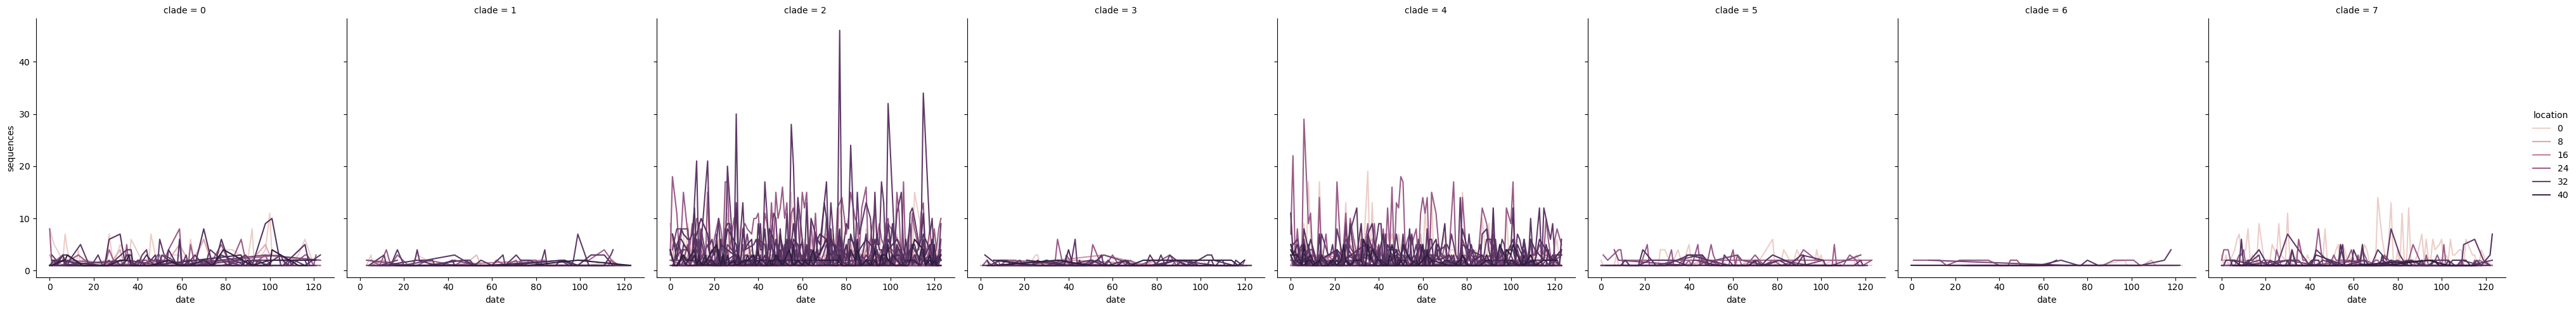

In [20]:
import seaborn as sns

#sns.lineplot(data=data, y = 'sequences', x = 'date', hue = 'clade')

# A lot of plots
#sns.relplot(data=data, x='date', y='sequences', row='clade', col='location', kind='line')
sns.relplot(data=data, x='date', y='sequences', col='clade', hue = 'location', kind='line')

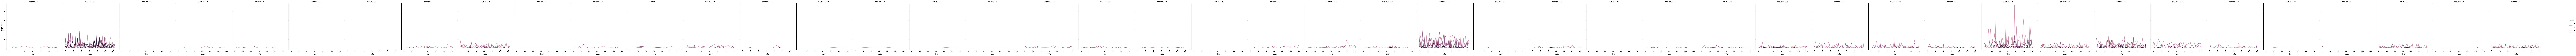

In [21]:
sns.relplot(data=data, x='date', y='sequences', hue='clade', col='location', kind='line')

In [22]:
data['location'].unique()

location
i64
0
1
2
3
4
…
40
41
42


Linear predictor form:

$$
\eta_i = \frac{\exp{(\alpha_{vl} + \beta_{vl} t)}}{ \sum_{k=1}^K \exp{(\alpha_{vl} + \beta_{vl} t)}} 
$$

In [23]:
locations

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [24]:
data['clade'].unique()

clade
i64
0
1
2
3
4
5
6
7


In [25]:
data['date'].unique()


date
i64
0
1
2
3
4
…
119
120
121


## Pre-process data into format for modeling

* Need to restructure data format to look like Multinomial counts for the below pyMC:
    * In particular, `Y` needs to look like `[[count1, count2, ..., countK], [count1, ..., countK]]` for each date.

In [26]:
df = pl.DataFrame(data)

# Pivot the DataFrame to get clade counts by date and location
pivot_df = df.pivot(values="sequences", columns="clade", index=["location", "date"], aggregate_function="sum")

# Fill missing values with 0 and convert to list format
pivot_df = pivot_df.fill_null(0)
pivot_df = pivot_df.with_columns([
    pl.concat_list(pivot_df.select(pl.exclude("location", "date"))).alias("clade_counts")
])

# Add total counts
pivot_df = pivot_df.with_columns([
    pivot_df.select(pl.exclude("location", "date", "clade_counts")).sum_horizontal().alias("total_counts")
])


/var/folders/15/gjw1xqz91mq9q73dqlw93_780000gn/T/ipykernel_78503/3038960788.py:4: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  pivot_df = df.pivot(values="sequences", columns="clade", index=["location", "date"], aggregate_function="sum")


In [27]:
pivot_df.head()

location,date,7,2,4,0,1,5,6,3,clade_counts,total_counts
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,list[i64],i64
15,25,1,0,0,0,0,0,0,0,"[1, 0, … 0]",1
15,5,0,1,0,0,0,0,0,0,"[0, 1, … 0]",1
15,118,0,1,0,0,0,0,0,0,"[0, 1, … 0]",1
15,95,0,1,0,0,0,0,0,0,"[0, 1, … 0]",1
15,60,0,2,0,0,0,0,0,0,"[0, 2, … 0]",2


In [28]:
# Prepare data for modeling

num_loc = len(pivot_df.select('location').unique())
num_diseases = len(data['clade'].unique())

time = pivot_df.get_column('date').to_numpy()
locations = pivot_df.get_column('location').to_numpy()
Y = np.vstack(pivot_df.get_column('clade_counts').to_numpy())
total_counts = np.array([i.sum() for i in Y]) # sum across multinomial observations for total counts each day/loc
# or
#total_counts = pivot_df.get_column('total_counts').to_numpy()

print(num_loc)
print(num_diseases)
print(time.shape)
print(locations.shape)
print(total_counts.shape)
print(Y.shape)


45
8
(2335,)
(2335,)
(2335,)
(2335, 8)


In [ ]:
# For later use, still WIP
coords = {"locations": locations, 
          "clades": clades,
          "time": time,
          "Y": Y}

In [ ]:
import pytensor

# How many draws/warmup
# VERY small sample for repo commit
n_draws = 1000
n_warmup = 200

# Define the model
#with pm.Model(coords=coords) as variant_model:
with pm.Model() as variant_model:
    # Priors for unknown model parameters with better initial values
    alpha = pm.Normal('alpha', mu=0, sigma=3, shape=(num_loc, num_diseases-1), 
                      initval=np.random.rand(num_loc, num_diseases-1))
    beta = pm.Normal('beta', mu=0, sigma=3, shape=(num_loc, num_diseases-1),
                     initval=np.random.rand(num_loc, num_diseases-1))
    
    # Expected value of outcome (using the softmax link function)
    eta = alpha[locations] + beta[locations] * time[:, None]

    # Softmax eta to probability scale, shape K-1
    mu = pytensor.tensor.special.softmax(eta, axis=1)

    # Add K-th category. Had to softmax this result (mu_softmax) to avoid numerical issues.
    mu = pm.math.concatenate([mu, 1 - pm.math.sum(mu, axis=1, keepdims=True)], axis=1)  # Add the K-th category
    mu_softmax = pytensor.tensor.special.softmax(mu, axis=1)

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Multinomial('Y_obs', n=total_counts, p=mu_softmax, observed=Y)
    
    # Inference
    #trace = pm.sample(10000, tune=2000, cores=2)
    trace = pm.sample(n_draws, tune = n_warmup, cores = 4)

    # Perform posterior predictive sampling within the model's context
    posterior_predictive = pm.sample_posterior_predictive(trace, var_names=['alpha', 'beta', 'Y_obs'])

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta]


Output()

Sampling 4 chains for 200 tune and 1_000 draw iterations (800 + 4_000 draws total) took 1543 seconds.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Sampling: [Y_obs, alpha, beta]


Output()

              mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha[0, 0] -0.324  3.009  -6.636    4.816      0.237    0.168     161.0   
alpha[0, 1]  0.278  2.768  -5.022    5.315      0.198    0.140     195.0   
alpha[0, 2] -0.509  2.973  -6.179    5.151      0.197    0.140     226.0   
alpha[0, 3]  0.151  2.654  -4.876    5.170      0.175    0.124     228.0   
alpha[0, 4]  0.125  2.937  -5.287    5.654      0.154    0.109     370.0   
...            ...    ...     ...      ...        ...      ...       ...   
beta[44, 2]  2.669  1.564  -0.203    5.350      0.203    0.144      60.0   
beta[44, 3] -1.102  2.234  -5.086    3.235      0.111    0.081     412.0   
beta[44, 4] -0.911  2.459  -5.991    3.313      0.231    0.164     110.0   
beta[44, 5] -1.326  2.506  -5.963    3.144      0.131    0.095     375.0   
beta[44, 6] -1.073  2.407  -5.727    3.220      0.144    0.102     282.0   

             ess_tail  r_hat  
alpha[0, 0]     254.0   1.02  
alpha[0, 1]     309.0   1

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>]], dtype=object)

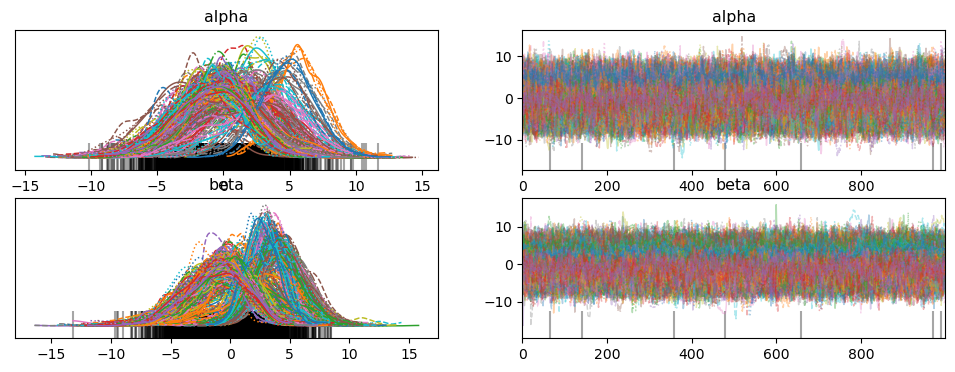

In [32]:
print(pm.summary(trace))

# Plot the results
pm.plot_trace(trace)

In [ ]:
import arviz as az

# Empirical CDF comparison
az.plot_ppc(posterior_predictive, show=True, kind = "cumulative")

Experimenting with Posterior Predictive output

In [ ]:
alpha_post = posterior_predictive.posterior_predictive.alpha[0,:,:,:]
alpha_post.shape

(1000, 6, 7)

In [ ]:
beta_post = posterior_predictive.posterior_predictive.beta[0,:,:,:]
beta_post.shape

(1000, 6, 7)

In [ ]:
posterior_predictive.posterior_predictive.alpha.shape
posterior_predictive.posterior_predictive.alpha[0,:,:].shape
#posterior_predictive.posterior_predictive.alpha[0,:,:]

# 1000 Posterior draws of alpha (#locs by #clades)
posterior_predictive.posterior_predictive.alpha[0,:]

# 1000 Posterior draws of beta (#locs by #clades)
posterior_predictive.posterior_predictive.beta[0,:]

# 1000 Posterior draws of Y_obs (noice)
posterior_predictive.posterior_predictive.Y_obs[0,:].shape

# First sample of multinomial counts
posterior_predictive.posterior_predictive.Y_obs[0,1].shape
posterior_predictive.posterior_predictive.Y_obs[0,1]

<xarray.DataArray 'Y_obs' (Y_obs_dim_2: 504, Y_obs_dim_3: 8)> Size: 32kB
array([[ 3,  4,  4, ...,  6, 13,  7],
       [ 3,  5,  4, ...,  3, 15,  4],
       [ 5,  1,  0, ...,  1,  6,  3],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  1, ...,  0,  0,  0]])
Coordinates:
    chain        int64 8B 0
    draw         int64 8B 1
  * Y_obs_dim_2  (Y_obs_dim_2) int64 4kB 0 1 2 3 4 5 ... 498 499 500 501 502 503
  * Y_obs_dim_3  (Y_obs_dim_3) int64 64B 0 1 2 3 4 5 6 7

In [ ]:
# Extract the model predictions
predicted_probs = posterior_predictive.posterior_predictive['Y_obs']
print(predicted_probs.shape)
print(predicted_probs[0].shape)
print(predicted_probs[0,0].shape)
predicted_probs[0,0]


(2, 1000, 504, 8)
(1000, 504, 8)
(504, 8)


<xarray.DataArray 'Y_obs' (Y_obs_dim_2: 504, Y_obs_dim_3: 8)> Size: 32kB
array([[ 4,  8,  4, ..., 12,  6,  3],
       [ 6,  8,  3, ..., 10,  6,  5],
       [ 2,  2,  4, ...,  6,  3,  2],
       ...,
       [ 0,  0,  1, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  1],
       [ 0,  0,  1, ...,  0,  0,  0]])
Coordinates:
    chain        int64 8B 0
    draw         int64 8B 0
  * Y_obs_dim_2  (Y_obs_dim_2) int64 4kB 0 1 2 3 4 5 ... 498 499 500 501 502 503
  * Y_obs_dim_3  (Y_obs_dim_3) int64 64B 0 1 2 3 4 5 6 7

In [ ]:
predicted_probs[0, :, :, :].mean(axis=1)

<xarray.DataArray 'Y_obs' (draw: 1000, Y_obs_dim_3: 8)> Size: 64kB
array([[1.16666667, 1.24603175, 1.18452381, ..., 2.5218254 , 1.14484127,
        1.20436508],
       [1.12698413, 1.15277778, 1.2797619 , ..., 2.57142857, 1.78571429,
        1.24206349],
       [1.15079365, 1.74603175, 1.93055556, ..., 1.25198413, 1.18253968,
        1.16666667],
       ...,
       [1.23412698, 1.14285714, 1.24603175, ..., 2.25396825, 1.96428571,
        1.20833333],
       [2.28373016, 1.82738095, 1.22420635, ..., 1.28571429, 1.3968254 ,
        1.09920635],
       [1.9702381 , 1.22420635, 1.81150794, ..., 1.68253968, 1.30357143,
        1.27579365]])
Coordinates:
    chain        int64 8B 0
  * draw         (draw) int64 8kB 0 1 2 3 4 5 6 ... 993 994 995 996 997 998 999
  * Y_obs_dim_3  (Y_obs_dim_3) int64 64B 0 1 2 3 4 5 6 7

In [ ]:
predicted_probs[0, :, :, 3]

<xarray.DataArray 'Y_obs' (draw: 1000, Y_obs_dim_2: 504)> Size: 4MB
array([[5, 5, 1, ..., 0, 0, 0],
       [4, 4, 2, ..., 1, 0, 0],
       [7, 9, 3, ..., 1, 0, 1],
       ...,
       [5, 2, 2, ..., 0, 0, 0],
       [1, 5, 1, ..., 0, 1, 0],
       [6, 5, 2, ..., 0, 0, 0]])
Coordinates:
    chain        int64 8B 0
  * draw         (draw) int64 8kB 0 1 2 3 4 5 6 ... 993 994 995 996 997 998 999
  * Y_obs_dim_2  (Y_obs_dim_2) int64 4kB 0 1 2 3 4 5 ... 498 499 500 501 502 503
    Y_obs_dim_3  int64 8B 3

In [ ]:

import pandas as pd

# Convert the predicted data to a DataFrame for plotting
predicted_data = pd.DataFrame({
    'time': time,
    'location': locations,
    'clade_1': predicted_probs[0, :, :, 0].mean(axis=1),
    'clade_2': predicted_probs[0, :, :, 1].mean(axis=1),
    'clade_3': predicted_probs[0, :, :, 2].mean(axis=1),
    'clade_4': predicted_probs[0, :, :, 3].mean(axis=1),
    'clade_5': predicted_probs[0, :, :, 4].mean(axis=1),
    'clade_6': predicted_probs[0, :, :, 5].mean(axis=1),
    'clade_7': predicted_probs[0, :, :, 6].mean(axis=1)
})

# Melt the predicted DataFrame for easier plotting with seaborn
predicted_data_melted = predicted_data.melt(id_vars=['time', 'location'], value_vars=['clade_1', 'clade_2', 'clade_3', 
                                                                                      'clade_4','clade_5','clade_6','clade_7'],
                                            var_name='clade', value_name='predicted_count')

# Plot the response counts over time for each location using a faceted grid without shaded regions
g = sns.FacetGrid(data_melted, col="location", hue="clade", col_wrap=3, height=4)
g.map(sns.lineplot, "time", "count", marker="o", ci=None)
g.map(sns.lineplot, "time", "predicted_count", data=predicted_data_melted, linestyle="--", ci=None)
g.add_legend()
g.set_axis_labels("Time", "Count")
g.set_titles("Location {col_name}")
plt.show()

In [ ]:
variant_model.basic_RVs

[alpha, beta, Y_obs]

In [ ]:
variant_model.observed_RVs

[Y_obs]

In [ ]:
variant_model.free_RVs

[alpha, beta]

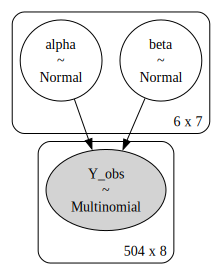

In [ ]:
variant_model.to_graphviz()